## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import sklearn
import scipy
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams["image.origin"] = 'upper'

In [3]:
import tqdm
#from tqdm import tqdm
from tqdm.notebook import tqdm # for notebooks
tqdm.pandas()

In [4]:
import pickle
import gc
collectAll = lambda : gc.collect(0) + gc.collect(1) + gc.collect(2)

In [5]:
from collections import namedtuple
import itertools
from itertools import product

In [6]:
from skimage.feature import graycomatrix
from skimage.feature import graycoprops
from math import pi

In [7]:
import PIL as pil
from PIL import Image, ImageDraw

In [8]:
import math

In [9]:
import sys
import os

In [10]:
import functools

In [11]:
import torch
import torchvision

In [12]:
from einops import *

In [13]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [14]:
import networkx as nx

In [15]:
from pathlib import Path

In [16]:
import umap
#Note: VERY HACKY: Manually fixed broken deps install.
import umap.plot
from umap import UMAP

E:\miniconda3\envs\up-to-date-env\Lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [17]:
import glasbey

## Load in our data

In [18]:
df_glcm = pd.read_pickle('df_glcm.pickle')

In [19]:
df_facenet = pd.read_pickle('df_facenet.pickle')

## UMAP using Facenet embeddings

Text(0.5, 0.98, 'UMAP of Chestnut and Casuarina together, 0.5-1.5 aspect ratio, no PCA, no whitening')

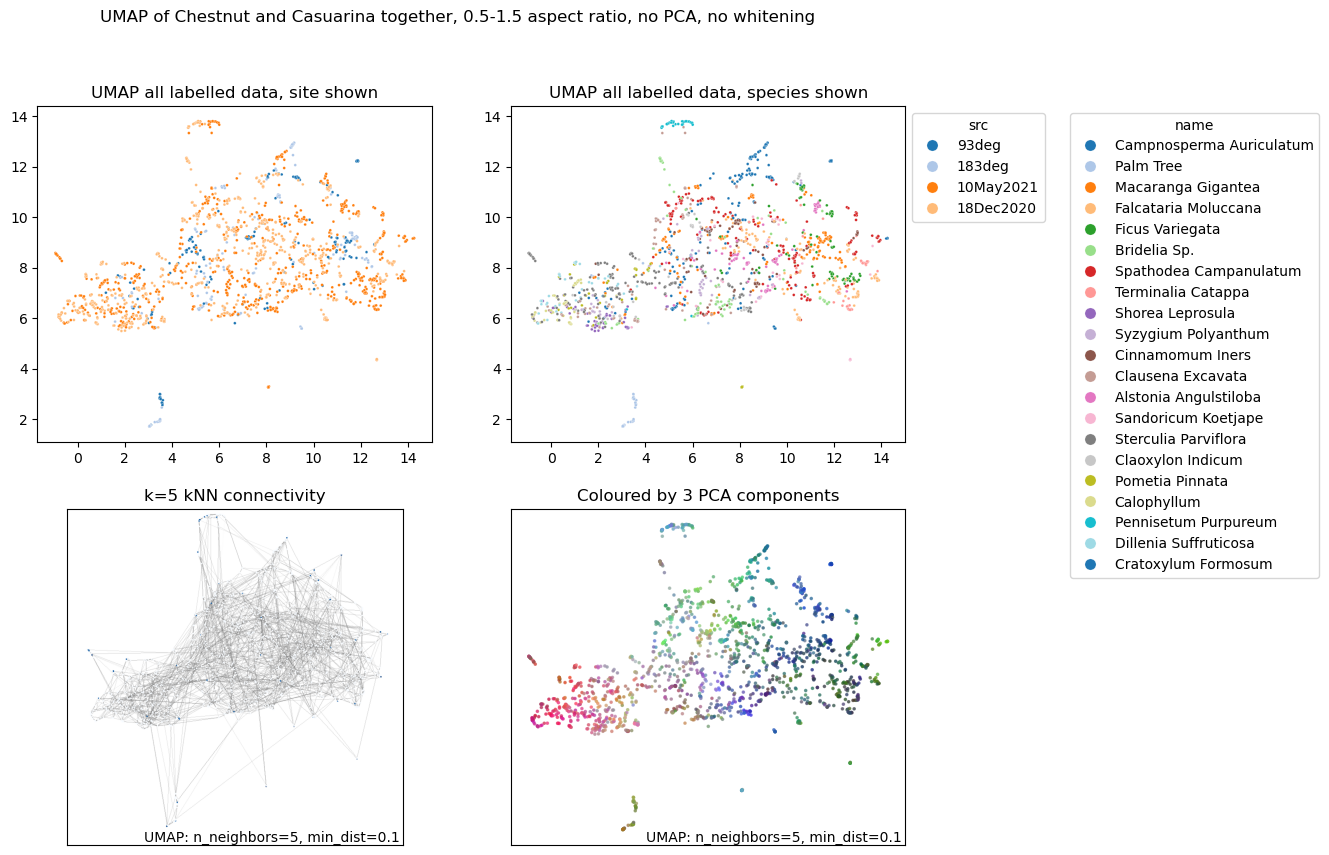

In [38]:
reducer = UMAP(n_components=2,
               metric='euclidean',
               n_neighbors=5,
               min_dist=0.1)

df = df_facenet
colname = 'pre_pca_augment_embeddings'
suptitle = 'UMAP of Chestnut and Casuarina together, 0.5-1.5 aspect ratio, no PCA, no whitening'

X = reducer.fit_transform(np.stack(df_facenet['embedding'].apply(lambda x: x.flatten())))
species = df['name'].unique()

fig, ax = plt.subplots(2, 2, figsize=(5.6*2, 4.8*2))
ax = ax.flatten()

g1 = sns.scatterplot(
    df,
    x=X[:,0], y=X[:,1],
    hue='src',
    palette='tab20',
    s=4,
    legend=True,
    ax=ax[0])
g2 = sns.scatterplot(
    df,
    x=X[:,0], y=X[:,1],
    hue='name', hue_order=species,
    palette='tab20',
    s=4,
    legend=True,
    ax=ax[1])

sns.move_legend(ax[0], "upper left", bbox_to_anchor=(2.2, 1), markerscale=4)
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1.4, 1), markerscale=4)

ax[0].set_title("UMAP all labelled data, site shown")
ax[1].set_title("UMAP all labelled data, species shown")

#Some very hacky monkey-patching!
class monkey_patch_with:
    def __init__(self):
        pass
    def add_subplot(self, *args, **kwargs):
        return ax[2]
old = plt.figure
plt.figure = lambda *args, **kwargs: monkey_patch_with()
umap.plot.connectivity(reducer, show_points=True)
plt.figure = old
del old
ax[2].set_title("k=5 kNN connectivity")

umap.plot.diagnostic(reducer, diagnostic_type='pca', ax=ax[3])
ax[3].set_title("Coloured by 3 PCA components")

#fig.tight_layout()
fig.suptitle(suptitle)